In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


# Cargar El dataset

In [18]:
# Read the Dataset
file_name = cache_file(
    "datasetSiniestro2.csv",
    "https://raw.githubusercontent.com/jgcotta/bigdata/master/datasetSiniestro.csv",
)
#If we need date
df = pd.read_csv(file_name, sep=';',parse_dates=[9])
#df.dtypes
#df = pd.read_csv(file_name, sep=';')
df.dtypes
df.head(5)

,CODIGO_SINIESTRO,DIA,ACTOR_VIAL,ESTADO,EDAD,SEXO,TIPO_AUTOMOVIL,SERVICIO,ENFUGA,FECHA,HORA,HORA_NUM,GRAVEDAD,TIPO_ACCIDENTE,TOTAL_MUERTOS,TOTAL_HERIDOS,LOCALIDAD,DISENO_LUGAR
0,4401420,jueves,CONDUCTOR,ILESO,20,MASCULINO,Automovil,Particular,N,2015-01-01,13:00:00,13,Solo Danos,Choque,0,0,Ciudad Bolivar,"Tramo de Via,"
1,4401420,jueves,CONDUCTOR,ILESO,27,MASCULINO,Automovil,Publico,N,2015-01-01,13:00:00,13,Solo Danos,Choque,0,0,Ciudad Bolivar,"Tramo de Via,"
2,4401442,jueves,PASAJERO,HERIDO,22,MASCULINO,Motocicleta,Particular,N,2015-01-01,16:15:00,16,Con Heridos,Atropello,0,3,San Cristobal,"Interseccion,"
3,4401442,jueves,MOTOCICLISTA,HERIDO,42,MASCULINO,Motocicleta,Particular,N,2015-01-01,16:15:00,16,Con Heridos,Atropello,0,3,San Cristobal,"Interseccion,"
4,4401430,jueves,MOTOCICLISTA,HERIDO,27,MASCULINO,Motocicleta,Oficial,N,2015-01-01,7:15:00,7,Con Heridos,Volcamiento,0,1,Ciudad Bolivar,"Tramo de Via,"


In [3]:
#profile = ProfileReport(d, title="Pandas Profiling Report")
#profile.to_notebook_iframe()

# Correlación Lineal (Variables Numéricas)

In [4]:
#muestra=df[["EDAD","TOTAL_HERIDOS","TOTAL_MUERTOS","HORA_NUM"]]
d=df.loc[:, ['EDAD', 'TOTAL_HERIDOS', 'TOTAL_MUERTOS']]

In [5]:
d.corr(method ='pearson')

,EDAD,TOTAL_HERIDOS,TOTAL_MUERTOS
EDAD,1.000000,-0.057049,-0.022085
TOTAL_HERIDOS,-0.057049,1.000000,0.103783
TOTAL_MUERTOS,-0.022085,0.103783,1.000000


In [6]:
#(d
#  .groupby("SEXO")
#  .agg(frequency=("SEXO", "count"))
#  .head())

# Análisis exploratorio variables categóricas

Histograma de Edad, de implicados en accidentes

array([[<AxesSubplot:title={'center':'EDAD'}>]], dtype=object)

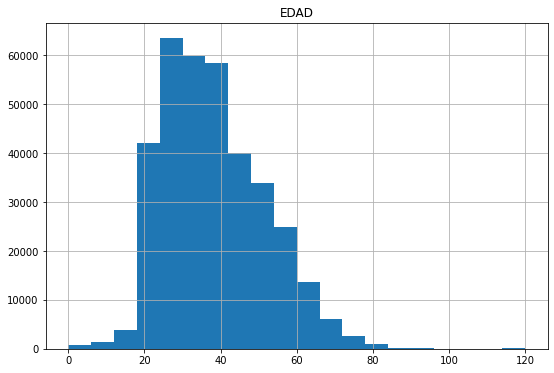

In [7]:
df.hist(column='EDAD',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20) 

Análisis del estado de llos implicados

In [8]:
tf1 = pd.crosstab(index=df["ESTADO"],
                     columns="Cantidad")
tf1

col_0,Cantidad
ESTADO,
HERIDO,61412
ILESO,289931
MUERTO,1394


In [ ]:
Agrupación de la población

In [9]:
tf2 = pd.crosstab(index=df["ACTOR_VIAL"], 
                     columns="Cantidad") 
tf2

col_0,Cantidad
ACTOR_VIAL,
CICLISTA,10298
CONDUCTOR,273024
MOTOCICLISTA,45066
PASAJERO,24349


Se obtiene la proporción del tipo de personas involucradas. Hacer diagrama de pie

In [10]:
tf2/tf2.sum()

col_0,Cantidad
ACTOR_VIAL,
CICLISTA,0.029195
CONDUCTOR,0.774016
MOTOCICLISTA,0.127761
PASAJERO,0.069029


In [11]:
(df.groupby("SEXO").agg(frequency=("SEXO", "count")).head())

,frequency
SEXO,
FEMENINO,48348
MASCULINO,304389


Quitar duplicados.

In [24]:
drop_duplicates=df.drop_duplicates(subset=['CODIGO_SINIESTRO'])

In [77]:
#drop_duplicates.info()

Cantidad de accidentes por días. La tendencia es que los viernes son los días más accidentados

In [91]:
tf3 = pd.crosstab(index=drop_duplicates["DIA"], 
                     columns="Cantidad") 
tf3

col_0,Cantidad
DIA,
domingo,16912
jueves,25845
lunes,23797
martes,26839
miercoles,25936
sabado,26125
viernes,27852


<AxesSubplot:xlabel='DIA'>

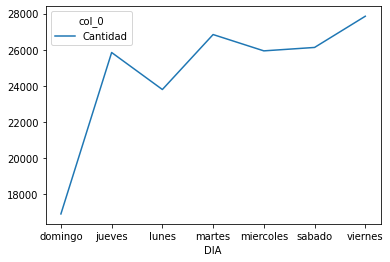

In [93]:
tf3.plot.line(stacked=True)

In [102]:
start_date = "2019-1-1"
end_date = "2019-1-31"
after_start_date = drop_duplicates["FECHA"] >= start_date
before_end_date = drop_duplicates["FECHA"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = drop_duplicates.loc[between_two_dates]
tf4 = pd.crosstab(index=filtered_dates["FECHA"], columns="Cantidad") 


<AxesSubplot:xlabel='FECHA'>

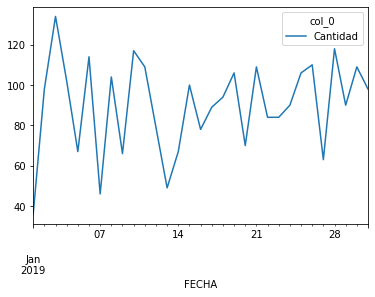

In [103]:
tf4.plot.line(stacked=True)

# Tablas de Frecuencias 1

Tabla de Contingencia ó Frecuencias Absolutas: Relación entre Actor_vial y genéro implicado en siniestro, obteniendo totales

In [70]:
#Formart to percentage
format_dict = {'CONDUCTOR': '{:.2%}','PASAJERO': '{:.2%}','CICLISTA': '{:.2%}','MOTOCICLISTA': '{:.2%}','FILA_TOTAL': '{:.2%}'}
genero_actor = pd.crosstab(index=df["SEXO"], 
                           columns=df["ACTOR_VIAL"],margins=True)
genero_actor.columns = ["CONDUCTOR","PASAJERO","CICLISTA","MOTOCICLISTA","FILA_TOTAL"]
genero_actor.index= ["MASCULINO","FEMENINO","COL_TOTAL"]
genero_actor

,CONDUCTOR,PASAJERO,CICLISTA,MOTOCICLISTA,FILA_TOTAL
MASCULINO,1788,27229,3623,15708,48348
FEMENINO,8510,245795,41443,8641,304389
COL_TOTAL,10298,273024,45066,24349,352737


Tabla de frecuencias Relativas: Relación entre Actor_vial y genéro implicado en sinisetro (En porcentaje), El 77.40% de los implicados en accidentes, son mujeres pasajeros de algún servicio público.

In [71]:
tabla_relativa=genero_actor/genero_actor.loc["COL_TOTAL","FILA_TOTAL"]
tabla_relativa.style.format(format_dict)

,CONDUCTOR,PASAJERO,CICLISTA,MOTOCICLISTA,FILA_TOTAL
MASCULINO,0.51%,7.72%,1.03%,4.45%,13.71%
FEMENINO,2.41%,69.68%,11.75%,2.45%,86.29%
COL_TOTAL,2.92%,77.40%,12.78%,6.90%,100.00%


Frecuencias Condicionadas(Proporciones) por columnas(Cada valor/total de la condicion de la columna). Ejemplo: Entre el año 2015 al 2019 de los conductores de automóviles implicados en accidentes, el 82.64% son mujeres. 

In [72]:
condicionada1=genero_actor/genero_actor.loc["COL_TOTAL"]
condicionada1[["CONDUCTOR","PASAJERO","CICLISTA","MOTOCICLISTA"]].style.format(format_dict)

,CONDUCTOR,PASAJERO,CICLISTA,MOTOCICLISTA
MASCULINO,17.36%,9.97%,8.04%,64.51%
FEMENINO,82.64%,90.03%,91.96%,35.49%
COL_TOTAL,100.00%,100.00%,100.00%,100.00%


Frecuencias Condicionadas(Proporciones) por Filas(Cada valor/total de la condicion de la fila). Ejemplo: Del 2015 al 2019 de los siniestros de tránsito en Bogotá, de la población masculina el 32.49% de los accidentados fueron motociclistas.

In [76]:
condicionada2=genero_actor.div(genero_actor["FILA_TOTAL"],
                   axis=0)
condicionada2.loc[["MASCULINO","FEMENINO"]].style.format(format_dict)

,CONDUCTOR,PASAJERO,CICLISTA,MOTOCICLISTA,FILA_TOTAL
MASCULINO,3.70%,56.32%,7.49%,32.49%,100.00%
FEMENINO,2.80%,80.75%,13.62%,2.84%,100.00%
